In [3]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import random

warnings.filterwarnings("ignore")

In [4]:
drive.mount('/content/drive')
path = 'drive/MyDrive/ASD_Research/'
data = pd.read_csv(path + 'combined.csv')
x_vals = data.iloc[:, 0:10]
y_vals = data.iloc[:, 14]

Mounted at /content/drive


In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vals, y_vals, test_size=0.2, random_state=481880
)

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=300,
    min_child_weight=3,
    max_depth=4,
    max_bin=512,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.5,
    random_state=1825
)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.7687861271676301


In [9]:
features = x_train.columns
importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
})
print(feature_importance_df)

  Feature  Importance
0      A1    0.062392
1      A2    0.072169
2      A3    0.050246
3      A4    0.076656
4      A5    0.069368
5      A6    0.224359
6      A7    0.155855
7      A8    0.049913
8      A9    0.161952
9     A10    0.077090


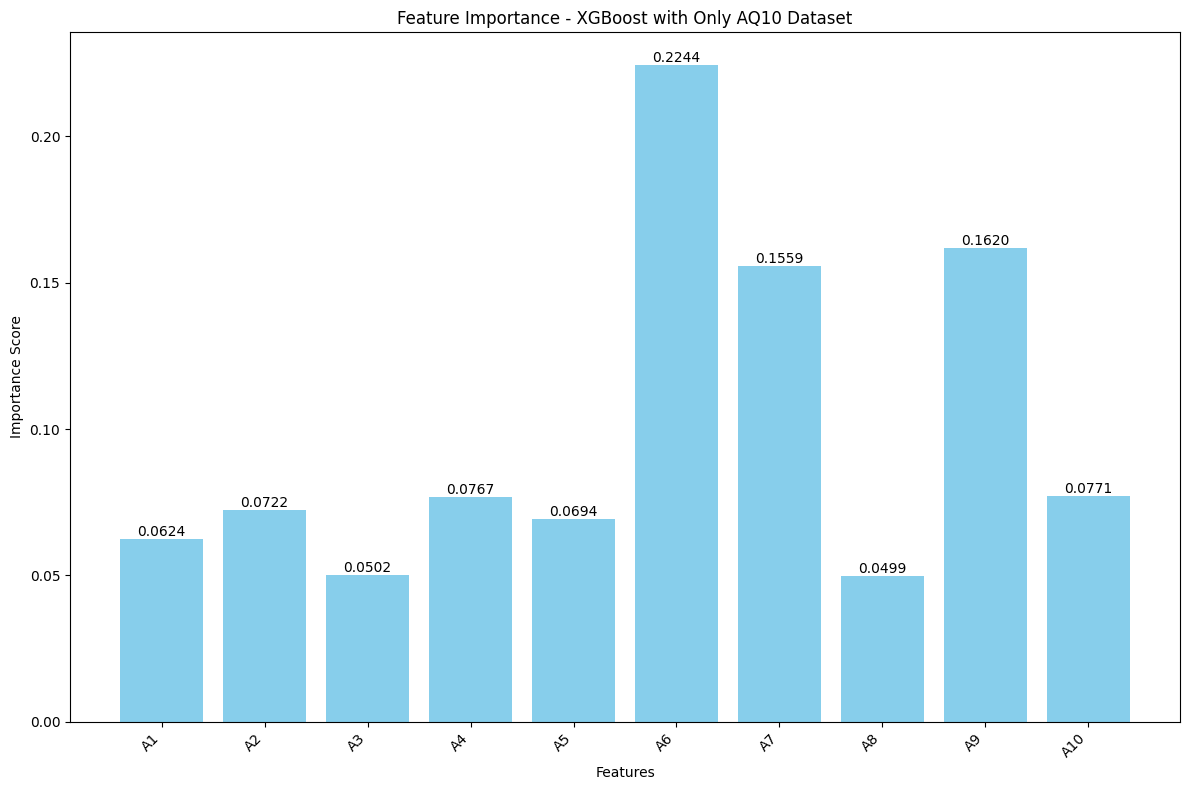

In [10]:
import numpy as np

# Extract feature importance
feature_importances_xgb = xgb_model.feature_importances_

# Plot bar graph of feature importance
plt.figure(figsize=(12, 8))
bars = plt.bar(x_vals.columns, feature_importances_xgb, color='skyblue')

# Annotate bars with actual values
for bar, importance in zip(bars, feature_importances_xgb):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{importance:.4f}', ha='center', va='bottom')

plt.title("Feature Importance - XGBoost with Only AQ10 Dataset")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()